In [1]:
import pandas as pd
import os as os
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

#Variables
ID = 'NaN'
Size = 'NaN'
Length = 'NaN'
Width = 'NaN'
Fersenbreite = 'NaN'
D1_L1 = 'NaN'
D2_L1 = 'NaN'
D3_L1 = 'NaN'
D4_L1 = 'NaN'
D5_L1 = 'NaN'
D1_L2 = 'NaN'
D2_L2 = 'NaN'
D3_L2 = 'NaN'
D4_L2 = 'NaN'
D5_L2 = 'NaN'

['(1).JPG', '(2).JPG', '(3).JPG', '(4).JPG', '(5).JPG', '20090313145121.JPG', '20090319102532.JPG', '20090323115358.JPG', '20090323115459.JPG', 'fg1_copy.JPG']
Lower_Limit is 753 dots.
Upper_Limit length is 6 dots.
Foot length is 747 dots.
Foot length is 26.35 cm.
Lower_Limit is 690 dots.
Upper_Limit length is 6 dots.
Foot length is 684 dots.
Foot length is 24.13 cm.
Lower_Limit is 724 dots.
Upper_Limit length is 7 dots.
Foot length is 717 dots.
Foot length is 25.29 cm.
Lower_Limit is 724 dots.
Upper_Limit length is 7 dots.
Foot length is 717 dots.
Foot length is 25.29 cm.
Lower_Limit is 768 dots.
Upper_Limit length is 6 dots.
Foot length is 762 dots.
Foot length is 26.88 cm.
Lower_Limit is 753 dots.
Upper_Limit length is 6 dots.
Foot length is 747 dots.
Foot length is 26.35 cm.
Lower_Limit is 690 dots.
Upper_Limit length is 6 dots.
Foot length is 684 dots.
Foot length is 24.13 cm.
Lower_Limit is 724 dots.
Upper_Limit length is 7 dots.
Foot length is 717 dots.
Foot length is 25.29 cm.


,ID,Size,Length,Width,Fersenbreite,D1_L1,D2_L1,D3_L1,D4_L1,D5_L1,D1_L2,D2_L2,D3_L2,D4_L2,D5_L2
0,(1),NaN,26.352500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(2),NaN,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(3),NaN,25.294167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(4),NaN,25.294167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(5),NaN,26.881667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20090313145121,NaN,26.352500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20090319102532,NaN,24.130000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20090323115358,NaN,25.294167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20090323115459,NaN,25.294167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,fg1_copy,NaN,27.128611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


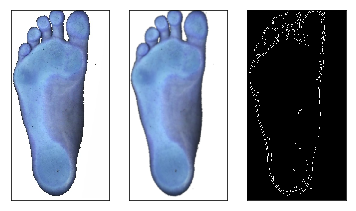

In [2]:
#Analyze all Pictures
#Initilaize Folder with Footscans
listOfAllFiles = os.listdir(path = "C:\\Users\\Fabian\\Desktop\\GIThub\\AnalyzingFootData")
                            # F:\\Dropbox\\ADICS\\22_Grundlagenentwicklung\\Fußscans Orthotec")
listOfAllScans = []
for scans in listOfAllFiles:
    if scans.endswith(".JPG"):
        listOfAllScans.append(scans)
print (listOfAllScans)


#Creates Dataframe with Columns
df = pd.DataFrame(columns=['ID','Size', 'Length','Width','Fersenbreite',
                           'D1_L1','D2_L1','D3_L1','D4_L1','D5_L1',
                           'D1_L2','D2_L2','D3_L2','D4_L2','D5_L2'])

for scan in listOfAllScans:
    image = cv2.imread(scan)#"fg1_copy.JPG",0) # Note: 0 specifies that we load a grayscale image

    # use gaussian filter as pre-processing step (otherwise edge detection does not work well)
    filtered = cv2.GaussianBlur(image,(9,9),0)

    # do edge detection on grayscale imagef
    edges = cv2.Canny(filtered,10,60)

    # visualization
    fig1 = plt.figure(1)
    plt.subplot(131)
    plt.imshow(image, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.subplot(132)
    plt.imshow(filtered, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.subplot(133)
    plt.imshow(edges, cmap = 'gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    #plt.show()
    #print(edges)

    height, width = edges.shape
    #print(height)

    upper_limit = -1
    for y in range(0,height-1):
        if sum(edges[y]) > 0:
            upper_limit = y
            #print(upper_limit)
            break

    lower_limit = -1
    for y in range(height-1,0,-1):
        if sum(edges[y]) > 0:
            lower_limit = y
            #print(lower_limit)
            break

    foot_length_dots = lower_limit - upper_limit
    #foot_length_dots = 7
    foot_length_inch = foot_length_dots/72
    foot_length_cm = foot_length_inch * 2.54
    print("Lower_Limit is " + str(round(lower_limit,2)) + " dots.")
    print("Upper_Limit length is " + str(round(upper_limit,2)) + " dots.")
    print("Foot length is " + str(round(foot_length_dots,2)) + " dots.")
    print("Foot length is " + str(round(foot_length_cm,2)) + " cm.")
    ##########here could happen the imageprocessing?
    ID = scan.strip(".JPG")
    df = df.append({'ID': ID,'Size':Size, 'Length': foot_length_cm,'Width': Width,'Fersenbreite': Fersenbreite,
                           'D1_L1': D1_L1,'D2_L1': D2_L1,'D3_L1': D3_L1,'D4_L1': D4_L1,'D5_L1': D5_L1,
                           'D1_L2': D1_L2,'D2_L2': D2_L2,'D3_L2': D3_L2,'D4_L2': D4_L2,'D5_L2': D5_L2},
                            ignore_index = True)  #Append data to DataFrame   

df